In [112]:
# import package
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv('../data/Kaggle_MBTI.csv')

In [166]:
tfidf_vec = TfidfVectorizer(max_features=500)
tfidf_dense = tfidf_vec.fit_transform(raw_data['posts']).todense()
new_cols = tfidf_vec.get_feature_names()

In [167]:
data = pd.DataFrame(tfidf_dense, columns=new_cols)
data['types'] = raw_data['type']

scaler = StandardScaler()
X_std = scaler.fit_transform(data.drop('types', axis= 1))


In [168]:
# train test split
# X = data.drop('types', axis=1)
X= X_std
y = data['types']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [138]:
types_16 = ['ENFJ','ENFP' ,'ENTJ' ,'ENTP' 
            ,'ESFJ' ,'ESFP' ,'ESTJ' ,'ESTP' 
            ,'INFJ' ,'INFP' ,'INTJ' ,'INTP' 
            ,'ISFJ' ,'ISFP' ,'ISTJ' ,'ISTP']  

## Logistic Regression

In [139]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ENFJ       0.75      0.08      0.14        38
        ENFP       0.72      0.59      0.64       135
        ENTJ       0.67      0.13      0.22        46
        ENTP       0.60      0.49      0.54       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       1.00      0.06      0.11        18
        INFJ       0.64      0.70      0.67       294
        INFP       0.56      0.85      0.67       366
        INTJ       0.65      0.66      0.65       218
        INTP       0.64      0.83      0.72       261
        ISFJ       0.50      0.06      0.11        33
        ISFP       0.73      0.15      0.25        54
        ISTJ       0.67      0.05      0.09        41
        ISTP       0.67      0.36      0.47        67

    accuracy                           0.62      1735
   macro avg       0.55   

In [140]:
y_test.value_counts()

INFP    366
INFJ    294
INTP    261
INTJ    218
ENTP    137
ENFP    135
ISTP     67
ISFP     54
ENTJ     46
ISTJ     41
ENFJ     38
ISFJ     33
ESTP     18
ESFP     10
ESFJ      9
ESTJ      8
Name: types, dtype: int64

[Text(105.0, 0.5, 'True'), Text(0.5, 87.0, 'Predicted')]

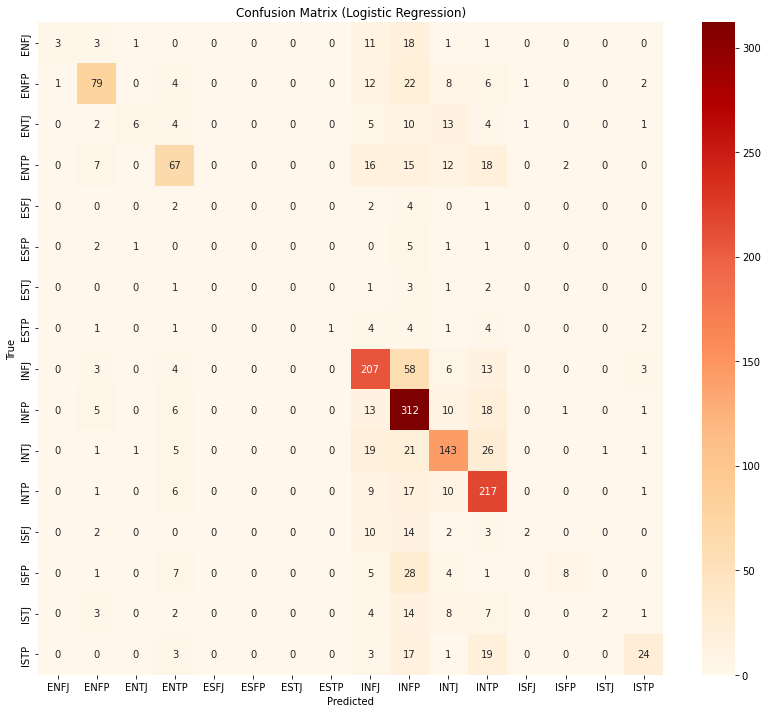

In [141]:
# plot cm
plt.figure(figsize = (14,12))
plt.title('Confusion Matrix (Logistic Regression)')
cm = confusion_matrix(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Predicted')
ax = sns.heatmap(cm, annot= True, fmt='g',cmap="OrRd", xticklabels=types_16, yticklabels= types_16)
ax.set(ylabel='True', xlabel='Predicted')


## KNN

In [ ]:
n_list = range(10,31,1)

knn_df = pd.DataFrame(columns=['n_neighbors', 'acc','macro_f1','micro_f1'])
cnt = 0
for i in tqdm(n_list):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average = 'macro')
    micro_f1 = f1_score(y_test, y_pred, average = 'micro')

    knn_df.loc[cnt] = [i, acc, macro_f1, micro_f1]
    cnt += 1

100%|██████████| 21/21 [03:19<00:00,  9.48s/it]


In [ ]:
knn_df

,n_neighbors,acc,macro_f1,micro_f1
0,10.0,0.307205,0.175179,0.307205
1,11.0,0.301441,0.149737,0.301441
2,12.0,0.306628,0.150647,0.306628
3,13.0,0.307781,0.147968,0.307781
4,14.0,0.311816,0.148563,0.311816
5,15.0,0.311239,0.148641,0.311239
6,16.0,0.314697,0.145906,0.314697
7,17.0,0.312968,0.141151,0.312968
8,18.0,0.307781,0.141290,0.307781
9,19.0,0.310663,0.141192,0.310663


In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ENFJ       0.14      0.08      0.10        38
        ENFP       0.18      0.10      0.13       135
        ENTJ       0.08      0.02      0.03        46
        ENTP       0.17      0.06      0.09       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       1.00      0.06      0.11        18
        INFJ       0.27      0.53      0.36       294
        INFP       0.34      0.50      0.41       366
        INTJ       0.33      0.19      0.24       218
        INTP       0.33      0.41      0.36       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.00      0.00      0.00        54
        ISTJ       0.67      0.05      0.09        41
        ISTP       0.00      0.00      0.00        67

    accuracy                           0.30      1735
   macro avg       0.22   

[Text(105.0, 0.5, 'True'), Text(0.5, 87.0, 'Predicted')]

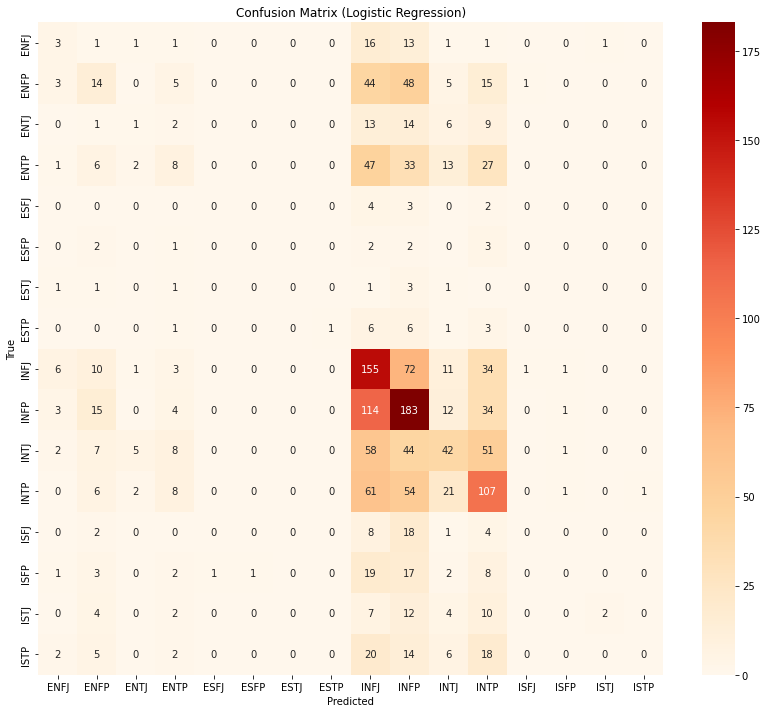

In [149]:
# plot cm
plt.figure(figsize = (14,12))
plt.title('Confusion Matrix (Logistic Regression)')
cm = confusion_matrix(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Predicted')
ax = sns.heatmap(cm, annot= True, fmt='g',cmap="OrRd", xticklabels=types_16, yticklabels= types_16)
ax.set(ylabel='True', xlabel='Predicted')


## DNN

In [16]:
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt

In [169]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
X_std = scaler.fit_transform(data.drop('types', axis= 1))
X_std

array([[0.        , 0.        , 0.11080474, ..., 0.34295907, 0.        ,
        0.4982268 ],
       [0.07979249, 0.15664844, 0.0945672 , ..., 0.18293824, 0.08801288,
        0.02657598],
       [0.10809856, 0.21221884, 0.25622907, ..., 0.34696879, 0.        ,
        0.10801111],
       ...,
       [0.09649376, 0.        , 0.05718047, ..., 0.39821189, 0.10643475,
        0.06427714],
       [0.0596562 , 0.23423384, 0.49491674, ..., 0.16412673, 0.        ,
        0.        ],
       [0.        , 0.13853188, 0.1254456 , ..., 0.25884998, 0.15566819,
        0.07050732]])

In [170]:
temp_data = data['types'].value_counts().reset_index().sort_values(by='index')
temp_data['class_weight'] =   temp_data.types.sum() / (temp_data.shape[0] * temp_data.types)
temp_data = temp_data.reset_index()
class_weights = temp_data['class_weight'].to_dict()

In [171]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
onehot = onehotencoder.fit_transform(data[['types']]).toarray()
y_train_df = pd.DataFrame(onehot)


In [172]:
# train test split
X = X_std
y = y_train_df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [173]:
X.shape

(8675, 499)

In [182]:
# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=128, input_dim=499, activation='relu')) 
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu', kernel_regularizer='l2')) 
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=64, activation='relu', kernel_regularizer='l2')) 
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Add output layer
model.add(Dense(units=16, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [183]:
model.fit(X_train, y_train, validation_split=0.1,epochs=50, batch_size=32, class_weight=class_weights)

Epoch 1/50
196/196 [==============================] - 4s 15ms/step - loss: 5.0603 - accuracy: 0.0743 - val_loss: 4.0922 - val_accuracy: 0.0793
Epoch 2/50
196/196 [==============================] - 3s 14ms/step - loss: 4.1417 - accuracy: 0.1026 - val_loss: 3.9293 - val_accuracy: 0.0908
Epoch 3/50
196/196 [==============================] - 3s 14ms/step - loss: 3.6454 - accuracy: 0.1300 - val_loss: 3.6873 - val_accuracy: 0.1427
Epoch 4/50
196/196 [==============================] - 3s 14ms/step - loss: 3.2686 - accuracy: 0.1699 - val_loss: 3.3106 - val_accuracy: 0.2262
Epoch 5/50
196/196 [==============================] - 3s 14ms/step - loss: 2.8819 - accuracy: 0.2155 - val_loss: 3.2237 - val_accuracy: 0.1960
Epoch 6/50
196/196 [==============================] - 3s 14ms/step - loss: 2.6012 - accuracy: 0.2509 - val_loss: 2.9089 - val_accuracy: 0.2867
Epoch 7/50
196/196 [==============================] - 3s 14ms/step - loss: 2.3522 - accuracy: 0.3040 - val_loss: 2.8868 - val_accuracy: 0.2882

In [181]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 8ms/step - loss: 1.9586 - accuracy: 0.5233


[1.958609700202942, 0.5233429670333862]